In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

/tmp/ipykernel_179368/2508750231.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  g.drop('name', 1).add_suffix(f'_{k}').rename({f'n_{k}': 'n'}, axis=1)


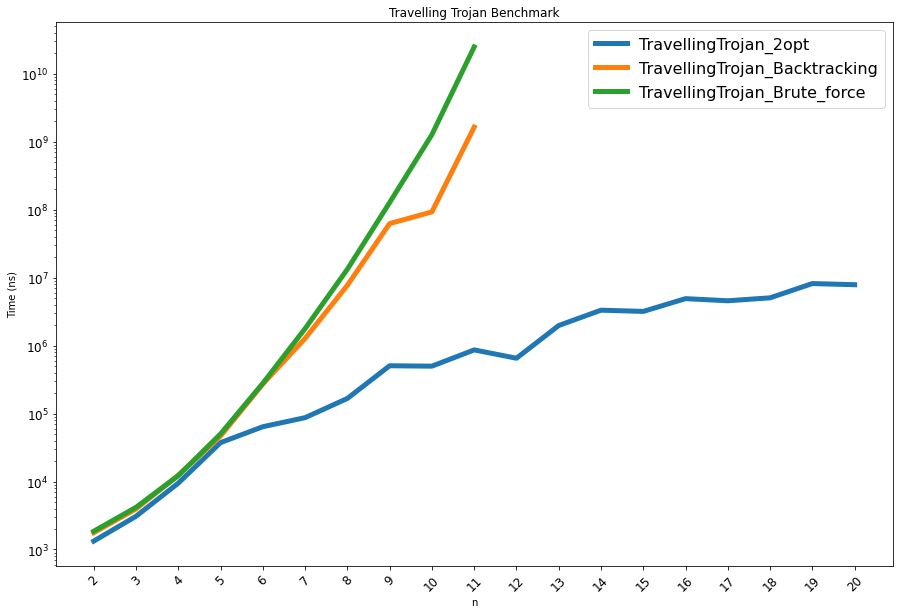

In [2]:
# Read input CSV file
df = pd.read_csv("TravellingTrojan_benchmark.csv")

#Remove '/' from the names and create a new column representing the size (n)
df[['name', 'n']] = df.name.str.split("/", expand=True)
df = df.filter(['name', 'n', 'real_time', 'cpu_time'])

# Filter out BigO and RMS rows
df = df[~df['name'].str.contains("BigO")]
df = df[~df['name'].str.contains("RMS")]

#Only keep n, name, and real_time columns
df = df.filter(['n', 'name', 'real_time'])
# print(df)

# Unstack data from various benchmarks and put them in new columns
dfs = [
    g.drop('name', 1).add_suffix(f'_{k}').rename({f'n_{k}': 'n'}, axis=1)
    for k, g in df.groupby('name')
]

df1 = reduce(lambda x, y: pd.merge(x, y, on='n', how="outer"), dfs)

# print(df1)
# Filter out the series that we want to be in the plot using --series
# series = ["real_time_BM_AutoComplete", ]
series = []
if series and len(series) > 0:
    columns_to_show = ['n'] + series
    df1 = df1.filter(columns_to_show)

# print(df1)

#Remove real_time_BM_ prefix from column names
df1.columns = [x.strip().replace('real_time_BM_', '') for x in df1.columns]

#Draw the plot
ax = df1.plot(x='n', figsize=(15, 10), legend=True, fontsize=12, rot=0, linewidth=5)

ax.set_xticks(np.arange(len(df1['n'])))
ax.set_xticklabels(df1['n'], rotation=45)
ax.legend(fontsize=16)
ax.set_yscale('log')
ax.set_title('Travelling Trojan Benchmark')
plt.ylabel('Time (ns)')
plt.savefig("TravellingTrojan_benchmark.png")
plt.show()